In [22]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Components = pca.fit_transform(x)
df_principal = pd.DataFrame(data = Components, columns = ['Component_1', 'Component_2', 'Component_3'])
df_principal

,Component_1,Component_2,Component_3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874


In [41]:
df_final = pd.concat([df_principal, df[['target']]], axis = 1)
df_final

,Component_1,Component_2,Component_3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


In [42]:
x_vals = df_final['Component_1']
y_vals = df_final['Component_2']
z_vals = df_final['Component_3']

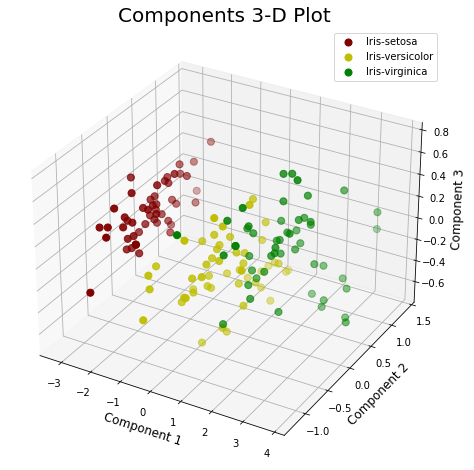

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontsize = 12)
ax.set_ylabel('Component 2', fontsize = 12)
ax.set_zlabel('Component 3', fontsize = 12)
ax.set_title('Components 3-D Plot', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['#800000', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['target'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'Component_1']
               , df_final.loc[indicesToKeep, 'Component_2']
               , df_final.loc[indicesToKeep, 'Component_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()